# Exploratory Data Analysis

## Import Warnings and Packages

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [6]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import sweetviz as sv
import missingno
%matplotlib inline


## Importing list of directors file

Dataset link: [Kaggle](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [3]:
df = pd.read_csv('DataSets/Movie500/movie_metadata.csv')

**Getting a report using Pandas-Profiling**

In [4]:
%%time

profile = df.profile_report(title='Movie Profiling Report')
profile.to_file(output_file="moviesdirectors.html")


Wall time: 2min 13s


**Report generation using sweetviz**

In [5]:
%%time
# analyzing the dataset
movies_report = sv.analyze(df)

:FEATURES DONE:                    |                     | [  0%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Wall time: 19.3 s


In [6]:
# display the report
movies_report.show_html('Movies_SweetViz.html')

In [4]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()

ModuleNotFoundError: No module named 'autoviz'

**Traditional approcah: exploring head values**

In [7]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [8]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3469,Color,Jane Campion,83.0,121.0,319.0,11.0,Ian Mune,1000,40158000.0,Drama|Music|Romance,...,241.0,English,New Zealand,R,7000000.0,1993.0,18.0,7.6,1.85,0.0
3470,Color,Steven Soderbergh,324.0,110.0,0.0,11000.0,Alex Pettyfer,17000,113709992.0,Comedy|Drama,...,281.0,English,USA,R,7000000.0,2012.0,15000.0,6.1,2.35,54000.0
3471,Color,Jonathan Liebesman,140.0,96.0,474.0,82.0,Emma Caulfield,1000,32131483.0,Horror|Mystery|Thriller,...,369.0,English,USA,PG-13,11000000.0,2003.0,970.0,4.9,2.35,2000.0
3472,Color,Guy Hamilton,136.0,121.0,82.0,189.0,Geoffrey Holder,581,35400000.0,Action|Adventure|Thriller,...,251.0,English,UK,PG,7000000.0,1973.0,547.0,6.8,1.66,0.0
3473,Color,Jay Russell,79.0,95.0,13.0,430.0,Frankie Muniz,1000,34099640.0,Drama|Family|Sport,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking null values


Preview of data with null values:
xxxxxxxxxxxxx


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,...,345.0,English,USA,PG,NaN,2015.0,150.0,6.8,2.35,20000.0
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677.0
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0.0
99,Color,Peter Jackson,645.0,182.0,0.0,773.0,Adam Brown,5000,303001229.0,Adventure|Fantasy,...,1367.0,English,USA,PG-13,180000000.0,2012.0,972.0,7.9,2.35,166000.0
177,Color,NaN,21.0,60.0,NaN,184.0,Philip Michael Thomas,982,NaN,Action|Crime|Drama|Mystery|Thriller,...,74.0,English,USA,TV-14,1500000.0,NaN,321.0,7.5,1.33,0.0
199,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000,NaN,Action|Fantasy,...,2.0,English,UK,NaN,NaN,2011.0,570.0,7.5,NaN,40.0
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0.0
206,Color,Matt Birch,4.0,NaN,0.0,1000.0,Toby Jones,10000,NaN,Fantasy,...,2.0,English,UK,NaN,NaN,2010.0,2000.0,6.4,NaN,25.0
242,Color,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936,NaN,Adventure|Comedy|Family|Fantasy,...,36.0,French,France,NaN,78000000.0,2008.0,276.0,5.1,2.35,291.0


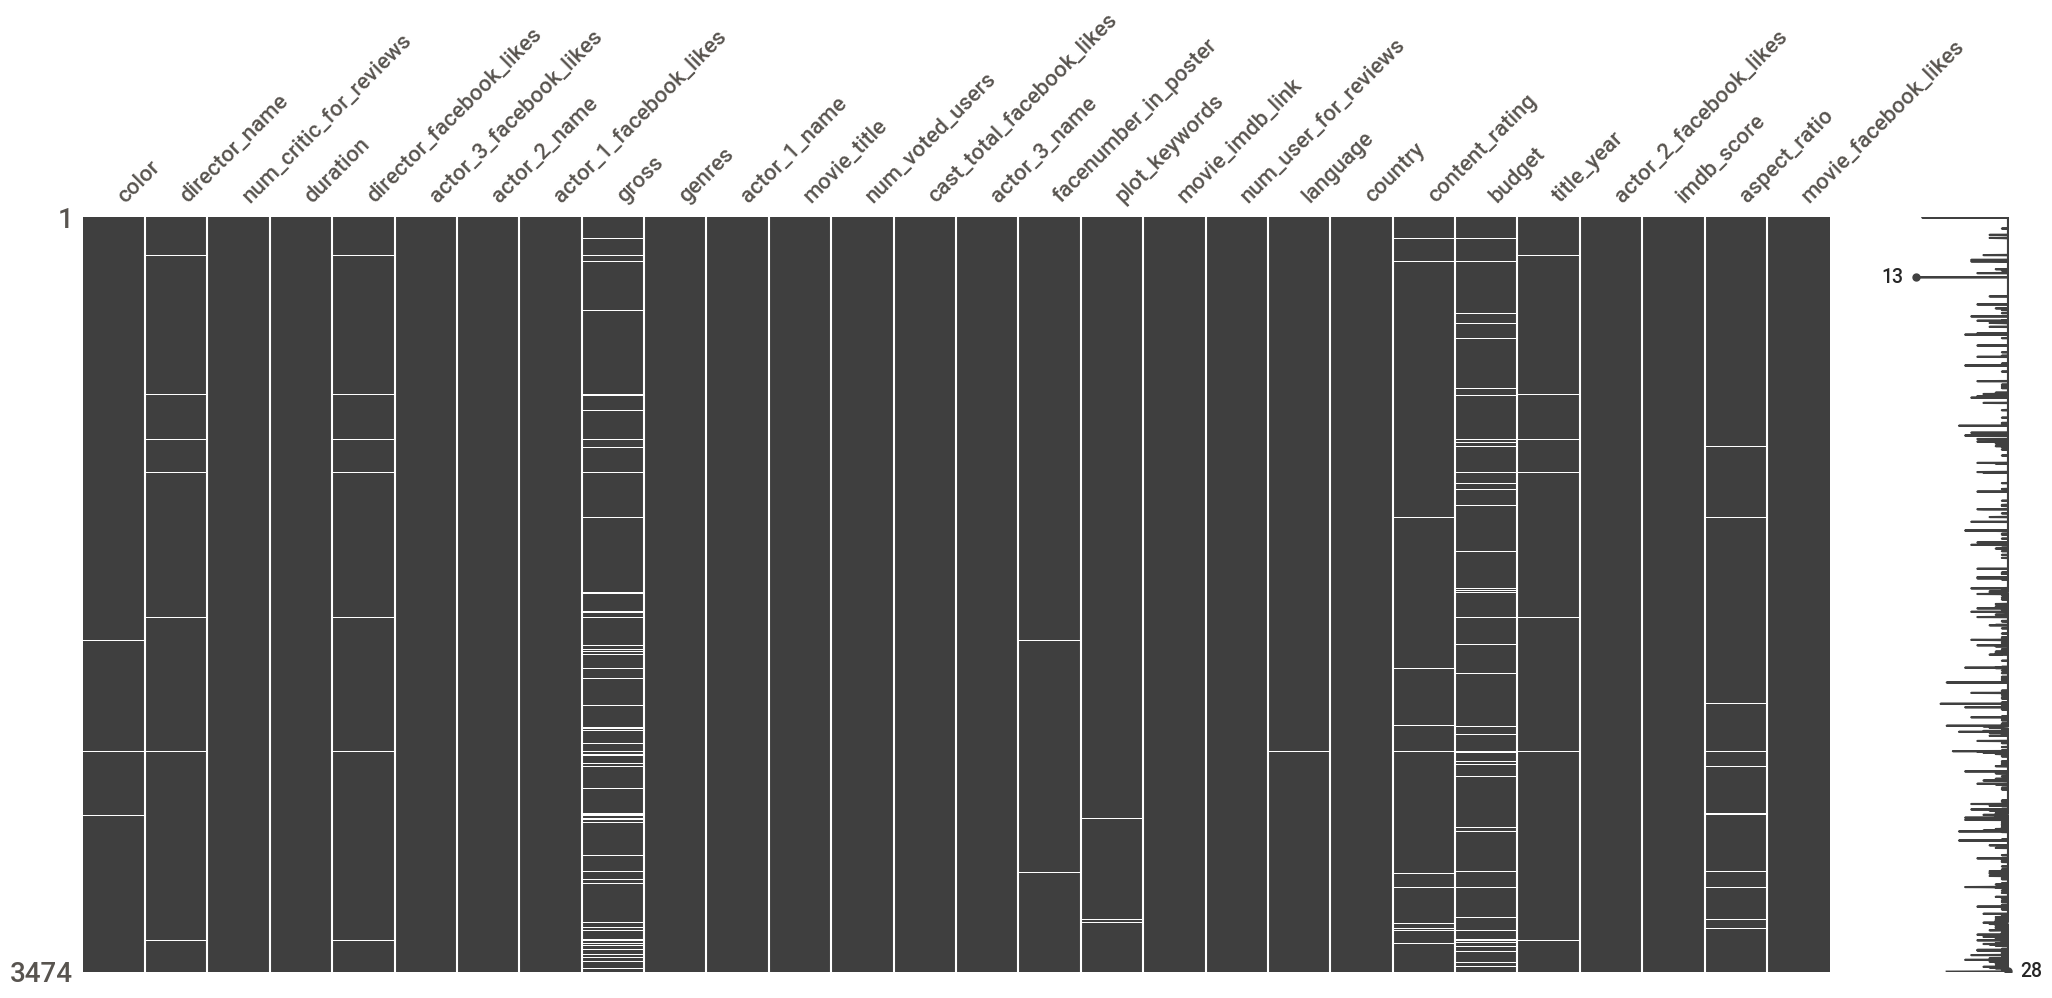

In [9]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    display(df[df.isnull().any(axis=1)].head(10))
    missingno.matrix(df)
    plt.show()

**traditional approach**

In [10]:
df.isnull().sum()

color                          8
director_name                 65
num_critic_for_reviews        11
duration                       4
director_facebook_likes       65
actor_3_facebook_likes         6
actor_2_name                   4
actor_1_facebook_likes         0
gross                        297
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   6
facenumber_in_poster           5
plot_keywords                 44
movie_imdb_link                0
num_user_for_reviews           9
language                       5
country                        5
content_rating                84
budget                       227
title_year                    70
actor_2_facebook_likes         5
imdb_score                     1
aspect_ratio                  78
movie_facebook_likes           1
dtype: int64

## Extracting required columns

*The goal of my project is to create a recommendation system which also displays the top 10 actors/cast in the movie. Therefore, i'm going to shed the other columns which are not going to contribute towards my goal*

In [11]:
data = df.loc[:, ['director_name', 'actor_1_name',
                  'actor_2_name', 'actor_3_name', 'genres', 'movie_title']]
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [12]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [13]:
data['genres'] = data['genres'].replace('|', ' ')

In [14]:
data['movie_title'] = data['movie_title'].str.lower()

In [15]:
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [16]:
data['movie_title'] = data['movie_title'].apply(lambda x: x[:-1])

## Exporting as CSV and dependencies list

In [17]:
data.to_csv('data.csv', index=False)

In [18]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark 

# date
print (" ")
%watermark -u -n -t -z 

ModuleNotFoundError: No module named 'watermark'

In [ ]:
from pip._internal.operations.freeze import freeze
for requirement in freeze(local_only=True):
    print(requirement)